### Екзаменаційна робота 
#### З дисципліни: Нейронні мережі
#### студента групи АнД-41 
#### Морозова Ростислава
#### Варіант - 9
#### Завдання:
#### Розробити Jupyter Notebook для вирішення завдання класифікації на основі наборів даних:
#### #1 - https://keras.io/api/datasets/mnist/

#### #2 - https://drive.google.com/drive/folders/15MdqvRMl8YPFCbemyiLdUcX5SL4A5mx2?usp=sharing

#### Забезпечити виконання наступних етапів:
#### 1. Завантаження та попередній аналіз даних.
#### 2. Вирішення завдання класифікації для набору даних #1 з використанням Feed-forward NN.
#### 2+.(для отримання оцінки "добре") +CNN.
#### 3. Вирішення завдання класифікації для набору даних #2 з використанням:
   #### 3.1. CNN (Кількість фільтрів: 4, Метод оптимізації: SGD)
   #### 3.2. Моделі Efficientnet репозиторію Tensorflow Hub
#### 4.(для отримання оцінки "відмінно", за умови виконання п.2+) 
   #### Здійснити точне настроювання моделі 3.2 з використанням: Pretrained model fine-tuning           
#### 5. Графічне відображення тренування моделей.
#### 6. Порівняння отриманих результатів для набору даних #2.
#### 7. Висновки.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae ,mse
from tensorflow.keras.optimizers import SGD, Adam

In [11]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [13]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [17]:
print("x_train: ",x_train.shape, ";", "y_train: ",y_train.shape)
print("x_test: ",x_test.shape, ";", "y_test: ",y_test.shape)

x_train:  (60000, 28, 28) ; y_train:  (60000,)
x_test:  (10000, 28, 28) ; y_test:  (10000,)


In [18]:
x_train[0] #Виведемо перший зразок у даних

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

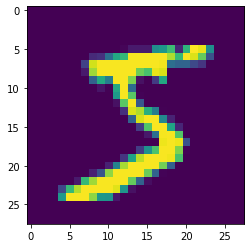

In [19]:
plt.imshow(x_train[0]) #Візуалізуємо його за допомогою графіка

In [20]:
y_train[0] #Виведемо номер класу цього зразка

5

In [22]:
print( "x_train.shape: ",x_train.shape)
print( "x_test.shape: ",x_test.shape)
print( "y_train.shape: ",y_train.shape)
print( "y_test.shape: ",y_test.shape)

x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


In [34]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
y_train = y_train.reshape(60000,1)
y_test = y_test.reshape(10000,1)

In [35]:
print("Збалансованість на тренувальній вибірці:")
np.unique(y_train,return_counts=True)

Збалансованість на тренувальній вибірці:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [36]:
print("Збалансованість на тестувальній вибірці:")
np.unique(y_test,return_counts=True)

Збалансованість на тестувальній вибірці:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [37]:
x_train.min(), x_train.max()

(0, 255)

In [38]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [42]:
#Модель з ReLu функцією та нормалізацією.

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

    
# Compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
history4 = model4.fit(x_train_norm, y_train, epochs=2,validation_data=(x_test_norm, y_test)) 

Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9760 - accuracy: 0.2316 - val_loss: 1.8640 - val_accuracy: 0.2622
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8179 - accuracy: 0.2707 - val_loss: 1.7876 - val_accuracy: 0.2791


In [45]:
from sklearn import metrics
y_prob = model4.predict(x_test_norm)
y_hat = y_prob.argmax(axis=1)
conf_matrix=metrics.confusion_matrix(y_test,y_hat)
conf_matrix

array([[   0,    4,    1,    1,   86,    3,   55,  751,    0,   79],
       [   0, 1129,    0,    2,    3,    1,    0,    0,    0,    0],
       [   0,  801,   22,   63,   94,   30,    5,   10,    0,    7],
       [   0,  820,   15,   55,   70,   33,    3,    9,    0,    5],
       [   0,   35,    8,   27,  528,   47,  120,  116,    0,  101],
       [   0,  499,   36,   85,  157,   70,   20,   21,    0,    4],
       [   0,   35,   12,   22,  268,   46,   86,  395,    0,   94],
       [   0,   40,    8,    6,  102,   18,   38,  766,    0,   50],
       [   0,  710,   25,   63,   90,   53,    7,   18,    0,    8],
       [   0,   18,    5,   15,  252,   22,  119,  443,    0,  135]],
      dtype=int64)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
for dirpath, dirnames, filenames in os.walk("exam_work"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'exam_work'.
There are 2 directories and 0 images in 'exam_work\Test'.
There are 0 directories and 1000 images in 'exam_work\Test\Fire'.
There are 0 directories and 1000 images in 'exam_work\Test\Non-Fire'.
There are 2 directories and 0 images in 'exam_work\Train'.
There are 0 directories and 3003 images in 'exam_work\Train\Fire'.
There are 0 directories and 3000 images in 'exam_work\Train\Non-Fire'.
There are 2 directories and 0 images in 'exam_work\Vali'.
There are 0 directories and 1000 images in 'exam_work\Vali\Fire'.
There are 0 directories and 1000 images in 'exam_work\Vali\Non-Fire'.


In [3]:
data_dir = pathlib.Path("exam_work/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Fire' 'Non-Fire']


In [4]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (224, 224, 3)


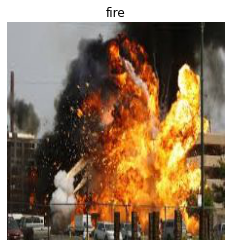

In [51]:
# View a random image from the training dataset
img = view_random_image(target_dir="exam_work/train/",
                        target_class="fire")

In [15]:
train_datagen_norm = ImageDataGenerator(rescale = 1/255.)
test_datagen_norm = ImageDataGenerator(rescale = 1/255.)
valid_datagen_norm = ImageDataGenerator(rescale = 1/255.)
# Setup the train and test directories
train_dir = "exam_work/train/"
test_dir = "exam_work/test/"
valid_dir = "exam_work/Vali/"

# Import data from directories and turn it into batches
train_data_norm = train_datagen_norm.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

test_data_norm = test_datagen_norm.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data_norm = valid_datagen_norm.flow_from_directory(valid_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.models.Sequential([
  Conv2D(filters=4, kernel_size=3, activation="relu", input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(4, 3, activation="relu"),
  MaxPool2D(pool_size=2,  padding="valid"), # padding can also be 'same'
  Conv2D(4, 3, activation="relu"),
  Conv2D(4, 3, activation="relu"), 
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid")])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data_norm,epochs=2,validation_data=valid_data_norm)

Epoch 1/2
 86/188 [============>.................] - ETA: 4:18 - loss: 0.6818 - accuracy: 0.5618

In [ ]:
predict = model_1.predict(test_data_norm)